In [1]:
print("hi")

hi


In [9]:
from ultralytics import YOLO
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [3]:
# Load the YOLO model
base_dir = '/home/ian/Documents/ingredient-recognition/model'
weights_path = os.path.join(base_dir, 'train/runs/detect/train/weights/best.pt')
model = YOLO(weights_path)

In [4]:
# Validate the model
data_path = os.path.join(base_dir, 'data/Food Ingredient Recognition.v4i.yolov11/data.yaml')
results = model.val(data=data_path, split='val')

Ultralytics 8.3.55 🚀 Python-3.12.2 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 4090, 24195MiB)


YOLO11m summary (fused): 303 layers, 20,077,063 parameters, 0 gradients, 67.9 GFLOPs


val: Scanning /home/ian/Documents/ingredient-recognition/model/data/Food Ingredient Recognition.v4i.yolov11/valid/labels.cache... 780 images, 67 backgrounds, 0 corrupt: 100%|██████████| 780/780 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:03<00:00, 13.42it/s]


                   all        780       2517      0.808      0.773       0.84      0.575
                 apple         10         20      0.917       0.85      0.861      0.745
             asparagus         12         47      0.446      0.277       0.25     0.0698
               avocado         13         49      0.954      0.843      0.964      0.716
                banana         15         25      0.844       0.88      0.944      0.651
           bell pepper         13         59       0.93      0.881      0.965      0.573
          bitter gourd         10         33      0.603      0.515      0.519      0.236
              bok choy         17         49      0.777       0.64      0.779      0.331
              broccoli          7         27      0.855      0.875      0.942      0.501
               cabbage         10         19      0.863      0.947       0.95      0.654
                carrot         14         39      0.621      0.615      0.651      0.269
                cashe

In [5]:
# Extract metrics
metrics = results.results_dict
print(metrics.keys())

for key in metrics:
    print(f"{key}: {metrics[key]}")

dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])
metrics/precision(B): 0.8078884003661476
metrics/recall(B): 0.7732209304315508
metrics/mAP50(B): 0.8404018969282532
metrics/mAP50-95(B): 0.5748395679503477
fitness: 0.6013958008481384


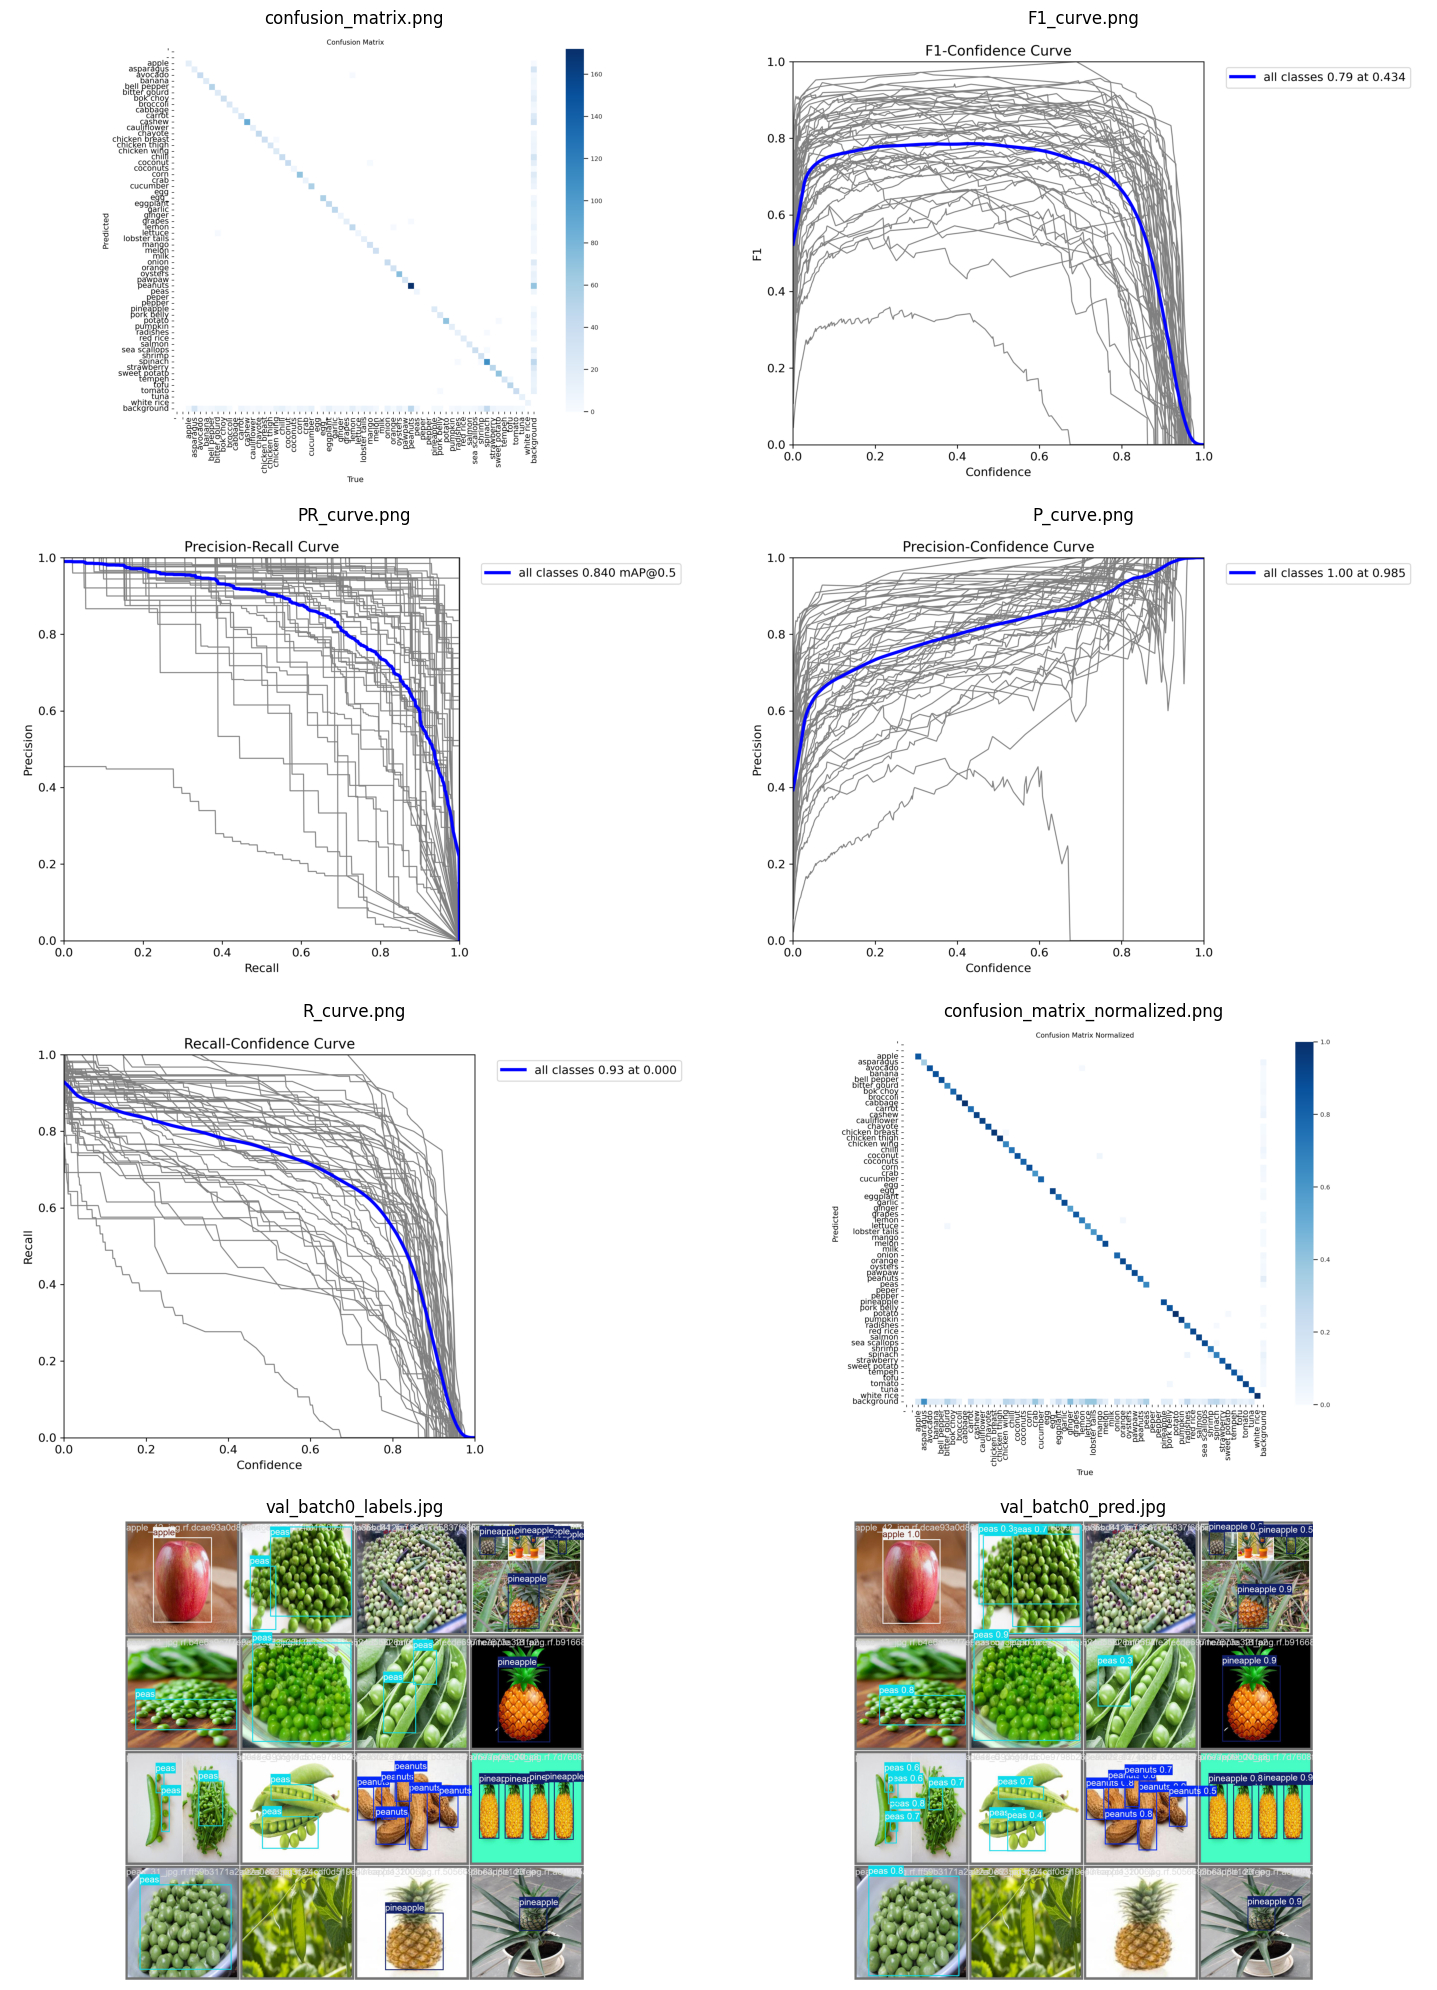

In [13]:
image_paths = [
  os.path.join(base_dir, 'train/runs/detect/val/confusion_matrix.png'),
  os.path.join(base_dir, 'train/runs/detect/val/F1_curve.png'),
  os.path.join(base_dir, 'train/runs/detect/val/PR_curve.png'),
  os.path.join(base_dir, 'train/runs/detect/val/P_curve.png'),
  os.path.join(base_dir, 'train/runs/detect/val/R_curve.png'),
  os.path.join(base_dir, 'train/runs/detect/val/confusion_matrix_normalized.png'),
  os.path.join(base_dir, 'train/runs/detect/val/val_batch0_labels.jpg'),
  os.path.join(base_dir, 'train/runs/detect/val/val_batch0_pred.jpg')
]

# Display all images
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for ax, img_path in zip(axes, image_paths):
  img = plt.imread(img_path)
  ax.imshow(img)
  ax.axis('off')  # Hide the axis
  ax.set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()